# 2. Financial Data Structures

In [67]:
# IMPORTS
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'plotly'

## Extract the data

In [62]:
data = pd.read_csv('data/real_data_2_days.csv')
data.tail(100)

,Date,SPY,SPY_Volume,VOO,VOO_Volume,IVV,IVV_Volume,QQQ,QQQ_Volume,DIA,...,FB,FB_Volume,GOOG,GOOG_Volume,GOOGL,GOOGL_Volume,NFLX,NFLX_Volume,TSLA,TSLA_Volume
680,19/10/2020 21:20,344.89,27951090.0,316.80,1233007.0,346.09,1640331.0,286.53,19973872.0,284.13,...,263.16,8155181.0,1552.78,749651.0,1548.01,825794.0,537.54,4892780.0,439.14,25454934.0
681,19/10/2020 21:21,344.88,28161755.0,316.82,1234952.0,346.10,1641733.0,286.51,20024474.0,284.19,...,263.18,8162445.0,1552.71,749997.0,1548.49,826337.0,537.29,4896946.0,439.10,25516998.0
682,19/10/2020 21:22,344.99,28254720.0,316.93,1239534.0,346.24,1644829.0,286.56,20076945.0,284.21,...,263.25,8173970.0,1552.71,750155.0,1548.04,826971.0,537.71,4907874.0,438.76,25567182.0
683,19/10/2020 21:23,344.99,28303701.0,317.01,1241521.0,346.20,1648651.0,286.50,20126247.0,284.28,...,263.25,8180162.0,1552.71,750240.0,1547.84,827857.0,537.86,4914004.0,438.60,25619265.0
684,19/10/2020 21:24,345.06,28355933.0,317.02,1242485.0,346.31,1650096.0,286.64,20169447.0,284.31,...,263.29,8186541.0,1552.71,750665.0,1547.79,828860.0,538.37,4930290.0,438.55,25671078.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775,19/10/2020 22:55,341.29,54081548.0,313.54,2040943.0,342.49,2644174.0,283.13,32090043.0,281.57,...,260.50,11224918.0,1532.77,1130528.0,1529.10,1209745.0,529.06,6823182.0,431.43,34131209.0
776,19/10/2020 22:56,341.29,54859571.0,313.50,2056012.0,342.43,2655776.0,283.15,32326301.0,281.48,...,260.77,11293048.0,1533.07,1141137.0,1528.92,1221249.0,529.21,6847679.0,431.77,34267845.0
777,19/10/2020 22:57,341.68,55379841.0,313.89,2070632.0,342.82,2701418.0,283.47,32570226.0,281.86,...,261.20,11397864.0,1533.81,1162321.0,1530.39,1229702.0,530.10,6887907.0,432.50,34381630.0
778,19/10/2020 22:58,341.68,55379841.0,313.89,2070632.0,342.82,2701418.0,283.47,32570226.0,281.86,...,261.27,11503748.0,1534.45,1183950.0,1530.89,1244381.0,530.50,6939163.0,431.23,34550660.0


In [61]:
spy_data = data['SPY']
spy_volume_data = data['SPY_Volume']
spy_volume_data.tail(100)

680    27951090.0
681    28161755.0
682    28254720.0
683    28303701.0
684    28355933.0
          ...    
775    54081548.0
776    54859571.0
777    55379841.0
778    55379841.0
779    55379841.0
Name: SPY_Volume, Length: 100, dtype: float64

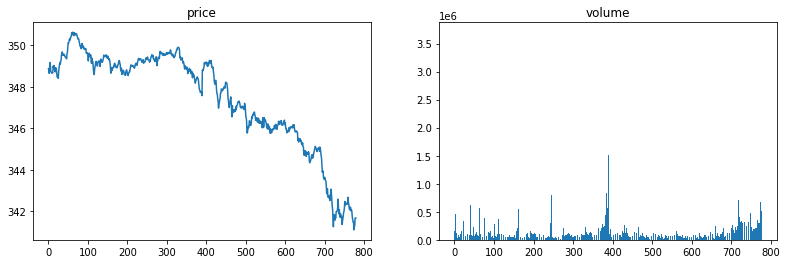

[727909.0, 304058.0, 295229.0, 536504.0, 669404.0, 723118.0, 778023.0, 520270.0, 0.0, 0.0]


In [66]:
spy_data = data['SPY']
spy_volume_data = data['SPY_Volume']

# undo cumsum to volume
spy_volume_data_2 = []
for vol_index in range(1, len(spy_volume_data)):
    next_var = spy_volume_data[vol_index]
    prev_var = spy_volume_data[vol_index-1]
    if next_var >= prev_var:
        spy_volume_data_2.append(next_var - prev_var)
    else:
        spy_volume_data_2.append(next_var)

fig = plt.figure(figsize=plt.figaspect(.3))
ax_1 = fig.add_subplot(1, 2, 1)
ax_2 = fig.add_subplot(1, 2, 2)
# index_spy, spy_to_plot = zip(*spy_data)
# index_spy_v, spy_to_plot_v = zip(*spy_volume_data)

ax_1.plot(spy_data.index, spy_data.values)
ax_1.set_title('price')

ax_2.bar(range(len(spy_volume_data_2)-2), spy_volume_data_2[:-2])
ax_2.set_title('volume')

plt.show()
print(spy_volume_data_2[-10:])

## (a) Form tick, volume, and dollar bars.

### Tick Bars

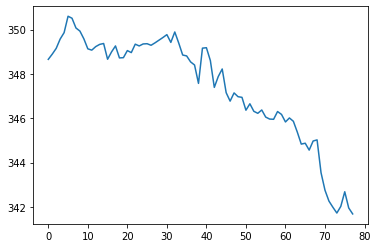

In [9]:
k = 10
ticks = []
counter = 0
for bar in spy_data:
    counter += 1
    if counter % 10 == 0:
        ticks.append(bar)

plt.plot(ticks)

### Volume Bars

### Dollar Bars

## (b) Count the number of bars produced by tick, volume, and dollar bars on a weekly basis. Plot a time series of that bar count. What bar type produces the most stable weekly count? Why?

## (c) Compute the serial correlation of returns for the three bar types. What bar method has the lowest serial correlation?

## (d) Partition the bar series into monthly subsets. Compute the variance of returns for every subset of every bar type. Compute the variance of those variances. What method exhibits the smallest variance of variances?

## (e) Apply the Jarque-Bera normality test on returns from the three bar types. What method achieves the lowest test statistic?

## 2.2 On a series of E-mini S&P 500 futures tick data, compute dollar bars and dollar imbalance bars. What bar type exhibits greater serial correlation? Why?

## ADF test

## CUSUM filter